How many files do you want to upload? 2

Enter information for file 1:
Select file type:
1. CSV file (.csv)
2. PDF file (.pdf)
3. XLSX file (.xlsx)
4. XML file (.xml)
5. JSON file (.json)
Enter the number corresponding to your choice: 1
Enter the file name (without extension): bpp_churn_data

Enter information for file 2:
Select file type:
1. CSV file (.csv)
2. PDF file (.pdf)
3. XLSX file (.xlsx)
4. XML file (.xml)
5. JSON file (.json)
Enter the number corresponding to your choice: 2
Enter the file name (without extension): bpp_churn_data
Here is the list of files you selected
bpp_churn_data.csv
bpp_churn_data.pdf
The file 'bpp_churn_data.csv' exists in the working folder.
The file 'bpp_churn_data.pdf' exists in the working folder.
in read_csv function
bpp_churn_data.csv
in read_pdf function
bpp_churn_data.pdf
Top 15 Rows of the DataFrame from CSV File
    customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0   4374-YMUSQ    Male            0.0      No        

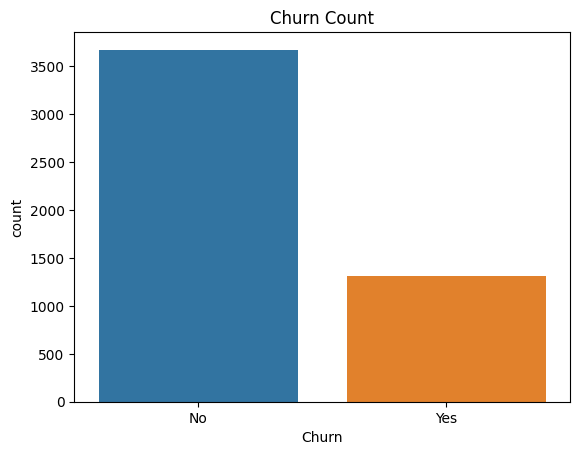

Printing DataFrame after Categorical Convert
Number of rows: 6525
Number of columns: 132
   customerID  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  4374-YMUSQ            0.0      No         No    34.0          Yes   
1  4513-CXYIX            1.0     Yes         No    71.0          Yes   
2  3957-HHLMR            0.0     Yes        Yes    70.0          Yes   
3  7803-XOCCZ            0.0     Yes        Yes    52.0          Yes   
4  5736-YEJAX            0.0      No        Yes    69.0          Yes   
5  5609-CEBID            1.0      No         No    20.0          Yes   
6  8981-FJGLA            0.0      No        Yes    11.0          Yes   
7  7218-HKQFK            0.0     Yes         No     2.0          Yes   
8  4636-QRJKY            0.0     Yes        Yes     6.0          Yes   
9  1135-LMECX            0.0      No         No     1.0          Yes   

  MultipleLines InternetService       OnlineSecurity         OnlineBackup  \
0           Yes     Fiber optic          

ValueError: ignored

In [24]:
# ***********************************Application Name Customer_Churn_Analysis***************************************************
# ***********************************Date Created : 25th Nov 2023***************************************************************
# ***********************************Created by : Deepak B Hota*****************************************************************
# Purpose of the Program : To read through the historical Churn data of customers' using various services of BPP telecom and
# analyse the data under predictive model to perform key findings and insights.
# The following programe uses Forcast Model using a common predictive algorithm to analyse the customer churn data of BPP Telecom
# This code snippet follows certain OOPs concepts though not fully aligned with OOPs concepts.
# Every function/routin/method defined in this program has it's own self explained information on the data and action if performs
# Every library that is used has comments, explaining the purpose and usage of the library
# if you have installed any of the packages then use the following code snippet to install the packages
# pip install pandas numpy tabula-py etc.
#*******************************************************************************************************************************

# import the pandas library using the alias "pd". Used for data manipulation and analysis
import pandas as pd

# import the NumPy library using the alias "np". Used for numerical and mathematical operations
import numpy as np

# import openpyxl to read data set from xls or xlsx formated files
import openpyxl

# import xml.etree.ElementTree to read data set from XML formated files
import xml.etree.ElementTree as ET

# import json to read data set from JSON formated files
import json

# import tabula.py to read data set from pdf formatted file.
import tabula
from tabula import read_pdf

# import the matplotlib.pyplot module, which is a popular plotting library in Python. This module provides a MATLAB-like plotting framework.
import matplotlib.pyplot as plt

# import the Seaborn data visualization library. Seaborn is built on top of Matplotlib and provides a high-level interface for drawing attractive statistical graphics.
import seaborn as sns

# import train_test_split function from the sklearn.model_selection module. Used for splitting datasets into training and testing sets in machine learning.
from sklearn.model_selection import train_test_split

# import the StandardScaler class from the sklearn.preprocessing module.
# The StandardScaler is a part of the scikit-learn library
# used for standardizing features by removing the mean and scaling to unit variance
from sklearn.preprocessing import StandardScaler

# importing RandomForestClassifier class from scikit-learn library
# a popular machine learning library
# The RandomForestClassifier is an implementation of the random forest algorithm for classification tasks.
from sklearn.ensemble import RandomForestClassifier

# import three commonly used functions from the scikit-learn library
# Used to evaluate classification models: accuracy_score, classification_report, and confusion_matrix.
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# import the files module from the google.colab library
# The files module in Colab is used for uploading and downloading files
from google.colab import files

# *********************START OF FUNCTION DEFINITION************************
# Function Name : select_file_type()
# Created on : 26/11/2023
# Creted by : Deepak B Hota
# This function will prompt the user to select a file type the user wants to upload
# to be used to read through the data file to create DataFrame
# The function/method/routine will return a value of file type string
# *************************************************************************
def select_file_type():
    print("Select file type:")
    print("1. CSV file (.csv)")
    print("2. PDF file (.pdf)")
    print("3. XLSX file (.xlsx)")
    print("4. XML file (.xml)")
    print("5. JSON file (.json)")

    choice = input("\033[1m\033[3mEnter the number corresponding to your choice: \033[0m")

    file_types = {
        '1': 'csv',
        '2': 'pdf',
        '3': 'xlsx',
        '4': 'xml',
        '5': 'json'
    }

    if choice in file_types:
        return file_types[choice]
    else:
        print("\033[1m\033[3mInvalid choice. Please enter a valid number.\033[0m")
        return select_file_type()
# *****************END OF FUNCTION DEFINITION******************************

# *************************START OF FUNCTION DEFINITION********************
# Function Name : enter_file_name()
# Created on : 26/11/2023
# Creted by : Deepak B Hota
# This function will prompt the user to enter the file name the user wants to upload
# to be used to read through the data file to create DataFrame
# The function/method/routine will return a value of file name string.
# *************************************************************************

def enter_file_name():
  file_name = input("\033[1m\033[3mEnter the file name (without extension): \033[0m")
  return file_name
# *****************END OF FUNCTION DEFINITION******************************

# *************************START OF FUNCTION DEFINITION********************
# Function Name : check_and_upload_file()
# Created on : 26/11/2023
# Creted by : Deepak B Hota
# This function will check the user selected file is existing or not
# If the file exists in the foler does nothing. If the file does exist
# then it will prompt to upload file and then upon successful upload
# shows a successful message or else failure message.
# to be used to read through the data file to create DataFrame
# *************************************************************************
def check_and_upload_file(file_name_list):
    try:
      for file_name in file_name_list:
        # Try to open the file to check if it exists
        with open(file_name, 'r'):
          print(f"\033[1m\033[3mThe file '{file_name}' exists in the working folder.\033[0m")
    except FileNotFoundError as e:
      print(f"\033[1m\033[3mThe file '{file_name}' does not exist in the working folder.\033[0m")
      # Prompt the user to upload the file
      uploaded_files = files.upload()
      # Check if the uploaded file matches the desired file name
      if file_name in uploaded_files:
        print(f"\033[1m\033[3mFile '{file_name}' uploaded successfully.\033[0m")
      else:
        print(f"\033[1m\033[3mFile '{file_name}' not uploaded. Please make sure to upload the correct file.\033[0m")
# *****************END OF FUNCTION DEFINITION******************************

# **********************START OF FUNCTION DEFINITION***********************
# Function Name : get_file_info()
# Created on : 26/11/2023
# Creted by : Deepak B Hota
# This function will ask user how many files he/she wants to upload
# loops that many times to take input of file names from user
# then it will return a list of files user wants to upload
# *************************************************************************
def get_file_info():
  num_files = int(input("\033[1m\033[3mHow many files do you want to upload? \033[0m"))

  file_info_list = []
  for i in range(num_files):
    print(f"\n\033[1m\033[3mEnter information for file {i + 1}:\033[0m")
    file_type = select_file_type()
    file_name = enter_file_name()
    full_file_name = f"{file_name}.{file_type}"
    file_info_list.append(full_file_name)

  return file_info_list

# *****************END OF FUNCTION DEFINITION****************************

# **********************START OF FUNCTION DEFINITION***********************
# Function Name : read_excel()
# Created on : 26/11/2023
# Creted by : Deepak B Hota
# This function will will read excel file and return a dataframe
# *************************************************************************
def read_excel(file_path):
  return pd.read_excel(file_path)
# *****************END OF FUNCTION DEFINITION****************************

# **********************START OF FUNCTION DEFINITION***********************
# Function Name : read_csv()
# Created on : 26/11/2023
# Creted by : Deepak B Hota
# This function will read csv file and return a dataframe
# *************************************************************************
def read_csv(file_path):
  print("in read_csv function")
  print(file_path)
  return pd.read_csv(file_path)
# *****************END OF FUNCTION DEFINITION****************************

# **********************START OF FUNCTION DEFINITION***********************
# Function Name : read_xml()
# Created on : 26/11/2023
# Creted by : Deepak B Hota
# This function will read xml file and return a dataframe
# *************************************************************************
def read_xml(file_path):
    tree = ET.parse(file_path)
    root = tree.getroot()

    data = []
    for elem in root:
        row = {}
        for child in elem:
            row[child.tag] = child.text
        data.append(row)

    return pd.DataFrame(data)

# *****************END OF FUNCTION DEFINITION****************************

# **********************START OF FUNCTION DEFINITION***********************
# Function Name : read_json()
# Created on : 26/11/2023
# Creted by : Deepak B Hota
# This function will read json file and return a dataframe
# *************************************************************************
def read_json(file_path):
    with open(file_path, 'r') as file:
        data = json.load(file)
    return pd.json_normalize(data)
# *****************END OF FUNCTION DEFINITION****************************

# **********************START OF FUNCTION DEFINITION***********************
# Function Name : read_pdf()
# Created on : 26/11/2023
# Creted by : Deepak B Hota
# This function will read pdf file and return a dataframe
# *************************************************************************
def read_pdf(file_path):
  print("in read_pdf function")
  print(file_path)
  return pd.concat(tabula.read_pdf(file_path, pages='all', multiple_tables=True))

# *****************END OF FUNCTION DEFINITION****************************

# **********************START OF FUNCTION DEFINITION***********************
# Function Name : merge_files()
# Created on : 26/11/2023
# Creted by : Deepak B Hota
# This function will merge all files user has uploaded and create
# a merged data frame. then return the merged dataframe to be used
# *************************************************************************
def merge_files(file_paths):
    frames = []

    for file_path in file_paths:
        file_extension = file_path.split('.')[-1]

        if file_extension == 'xlsx':
            df = read_excel(file_path)
        elif file_extension == 'csv':
            df = read_csv(file_path)
        elif file_extension == 'xml':
            df = read_xml(file_path)
        elif file_extension == 'json':
            df = read_json(file_path)
        elif file_extension == 'pdf':
            df = read_pdf(file_path)
        else:
            print(f"Unsupported file type: {file_extension}")
            continue

        frames.append(df)

    if frames:
        merged_df = pd.concat(frames, ignore_index=False)
        #merged_df = merged_df.dropna()  # Drop rows with missing data
        merged_df = merged_df.drop_duplicates()  # Drop duplicate rows
        return merged_df
    else:
        print("No valid files to merge.")
        return None

# *****************END OF FUNCTION DEFINITION****************************

# Call get_file_info function() to read list of file names from user
# This will return a list of files and saves in a list variable
all_files_list = get_file_info()

print("\033[1m\033[3mHere is the list of files you selected\033[0m")
for file_info in all_files_list:
    print(file_info)

# call check_and_upload_file() function to loop through
# each file user chosen to upload, is already available or not
# if not then prompt to upload
check_and_upload_file(all_files_list)

# call the merge_files() function passing the file list arguement
# Will read through each file and will return a merged dataframe
df = merge_files(all_files_list)

# Get user's file type choice
#selected_file_type = select_file_type()

# Get user's file name
#selected_file_name = enter_file_name()

# Combine file type and name to get the full file name
#full_file_name = f"{selected_file_name}.{selected_file_type}"

#print(f"Selected file type: {selected_file_type}")
#print(f"Selected file name: {selected_file_name}")
#print(f"Full file name: {full_file_name}")


# Following code will create a Dataframe reading data from the CSV and PDF file. The code is written in Try and Exception block.
# If the file is not present at the working folder location, it will throw the FileNotFoundError exception.
# when the exception is thrown, it will call the method/routine/function check_and_upload_file(), the function takes file type as parameter

# Explore the first few rows of the dataset
# Print the result
print(f"\033[1m\033[3mTop 15 Rows of the DataFrame from CSV File\033[0m")
print(df.head(15))

# Check for missing values
print("\033[1m\033[3mPrint the count of missing values for each field/column/attribute\033[0m")
print(df.isnull().sum())

# Explore basic statistics of the numerical features
print(df.describe())

# Visualize the distribution of the target variable ('Churn')
sns.countplot(x='Churn', data=df)
plt.title("Churn Count")
plt.show()

# Convert categorical variables to numerical using one-hot encoding
df = pd.get_dummies(df, columns=['gender'])

print("\033[1m\033[3mPrinting DataFrame after Categorical Convert\033[0m")

# Explore the first few rows of the dataset
num_rows, num_columns = df.shape

# Print the result
print(f"\033[1m\033[3mNumber of rows: {num_rows}\033[0m")
print(f"\033[1m\033[3mNumber of columns: {num_columns}\033[0m")

print(df.head(10))

# Split the data into features (X) and target variable (y)
columns_to_drop = ['customerID','Churn', 'Partner', 'Dependents',
                   'PhoneService','MultipleLines','InternetService',
                   'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                   'TechSupport', 'StreamingTV','StreamingMovies',
                   'Contract', 'PaperlessBilling', 'PaymentMethod' ]
X = df.drop(columns=columns_to_drop, axis=1)
# X = X[X.applymap(lambda x: x != ' ').all(axis=1)]
# X = X.replace({'Yes':1, 'No':0})
X.replace(' ', 0)
print("\033[1m\033[3mPrinting X DataFrame after droping columns\033[0m")

# Explore the first few rows of the dataset
num_rows, num_columns = X.shape

# Print the result
print(f"\033[1m\033[3mNumber of rows: {num_rows}\033[0m")
print(f"\033[1m\033[3mNumber of columns: {num_columns}\033[0m")

print(X.head(15))
print(X.isnull().sum())

y = df['Churn'].replace({'Yes':1, 'No':0})
print("\033[1m\033[3mPrinting y DataFrame for Churn\033[0m")

# Explore the first few rows of the dataset
num_rows = y.shape

# Print the result
print(f"\033[1m\033[3mNumber of rows: {num_rows}\033[0m")
print(f"\033[1m\033[3mNumber of columns: {num_columns}\033[0m")

print(y)
print(y.isnull().sum())

print(X.shape, y.shape)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.11, random_state=42)

# Replace ' ' with NaN and then impute missing values
X_train.replace(' ', pd.NaT, inplace=True)  # Replaces ' ' with NaN
X_train.fillna(0, inplace=True)    # Replace NaN with some numeric value

# Standardize numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize the RandomForestClassifier (you can choose other classifiers)
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{class_report}')

# Feature importance plot
feature_importances = model.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance')
plt.show()
